In [154]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score


# Information About Dataset

In [155]:
df_train = pd.read_csv('train_air.csv')
df_test = pd.read_csv('test_air.csv')

In [156]:
df_train.shape

(103904, 25)

In [157]:
df_test.shape

(25976, 25)

In [158]:
df_train.drop(['Unnamed: 0', 'id'], axis= 1, inplace= True)
df_test.drop(['Unnamed: 0', 'id'], axis= 1, inplace= True)

In [159]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [160]:
for col in df_train.columns:
    print(df_train[col].unique())

['Male' 'Female']
['Loyal Customer' 'disloyal Customer']
[13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]
['Personal Travel' 'Business travel']
['Eco Plus' 'Business' 'Eco']
[ 460  235 1142 ...  974 1479  400]
[3 2 4 1 5 0]
[4 2 5 3 1 0]
[3 2 5 4 1 0]
[1 3 2 5 4 0]
[5 1 2 4 3 0]
[3 5 2 1 4 0]
[5 1 2 3 4 0]
[5 1 2 3 4 0]
[4 1 2 3 5 0]
[3 5 4 2 1 0]
[4 3 5 1 2]
[4 1 3 5 2 0]
[5 4 3 1 2 0]
[5 1 2 3 4 0]
[  25    1    0   11    9    4   28   43   49    7   17   52   54   27
   18   19    3  109   23    8   14   10   51   39   13   30   64   20
   45   44   31   81   35   67   22   40   91   21   15   29  105   12
  162   24  141    6   34    2   97   16   99   37   66   53   36  209
   60  149   26    5   59   62  113   38   83  176   46   73  199   56
   93   70   80   96   57   95   74  172   63  175  143   48

In [161]:
df_train.iloc[:,6:20]

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,2,1,2,3,2,2,2,2,3,1,4,2,3,2
103900,4,4,4,4,2,4,5,5,5,5,5,5,5,4
103901,1,1,1,3,4,1,5,4,3,2,4,5,5,4
103902,1,1,1,5,1,1,1,1,4,5,1,5,4,1


In [162]:
categor_col= ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
df_train[categor_col] = df_train[categor_col].astype(object)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  object 
 7   Departure/Arrival time convenient  103904 non-null  object 
 8   Ease of Online booking             103904 non-null  object 
 9   Gate location                      103904 non-null  object 
 10  Food and drink                     103904 non-null  object 
 11  Online boarding                    1039

# EDA

In [163]:
cat_columns = df_train.select_dtypes(object).columns.to_list()
print(cat_columns)
num_columns = df_train.select_dtypes(np.number).columns.to_list()
print(num_columns)

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction']
['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


### Numerical Variables

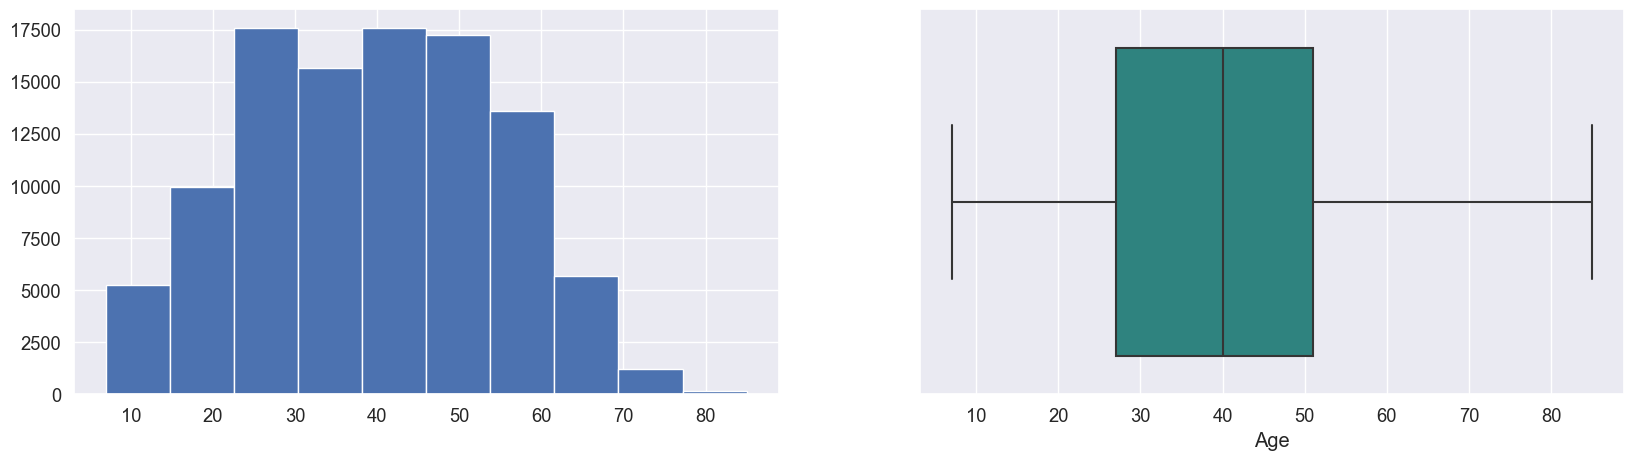

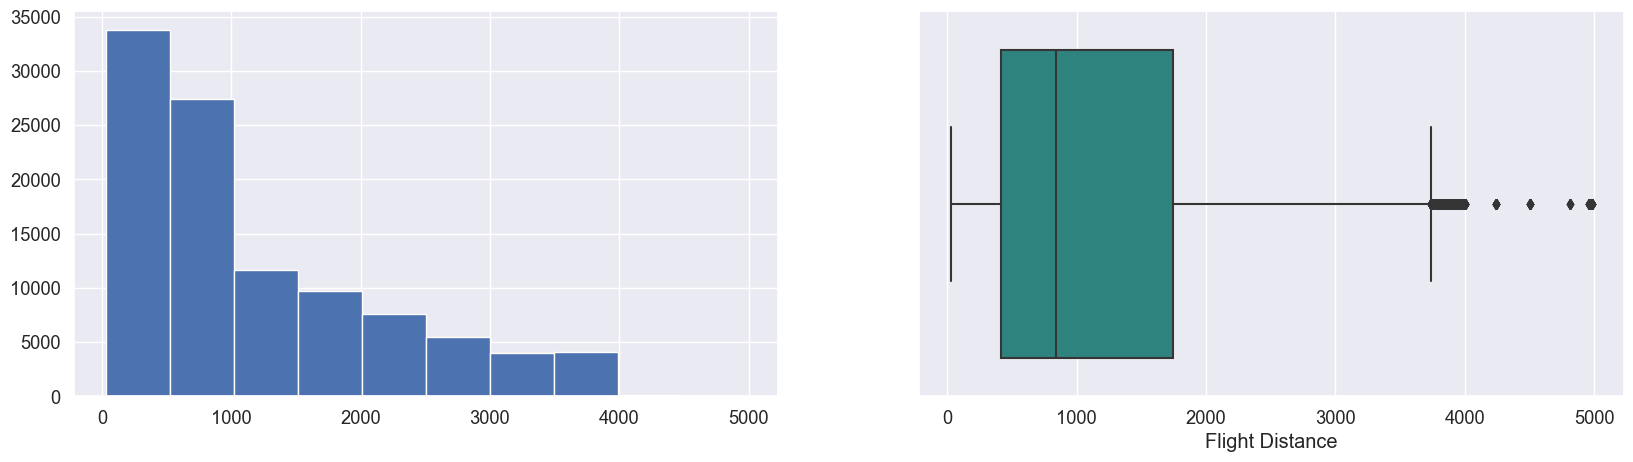

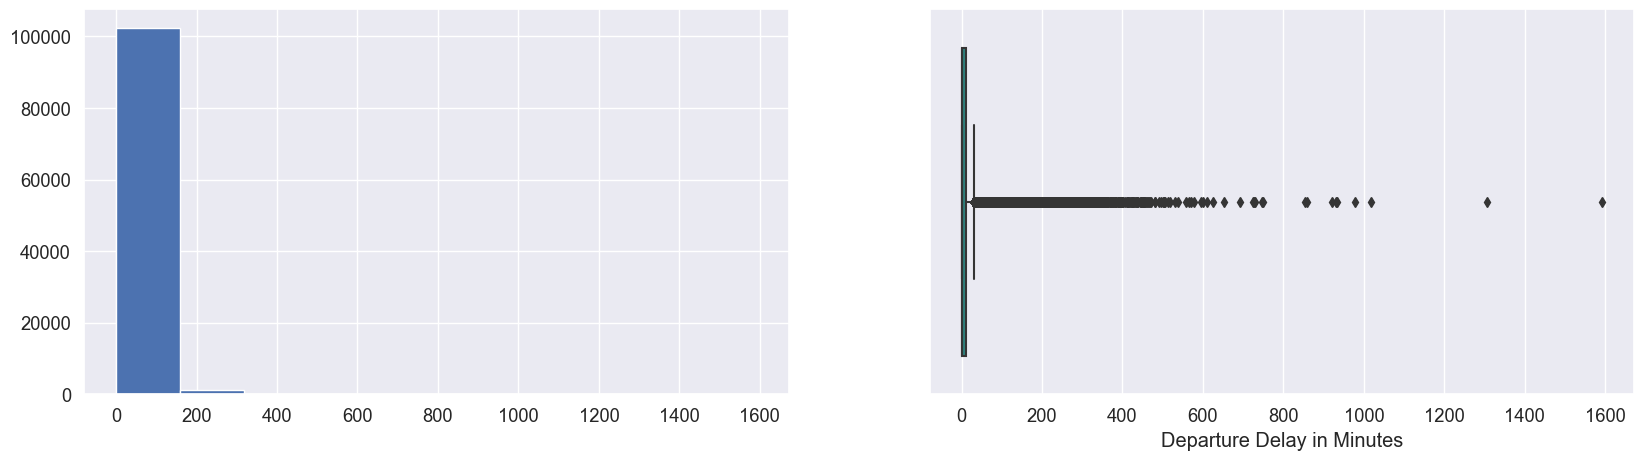

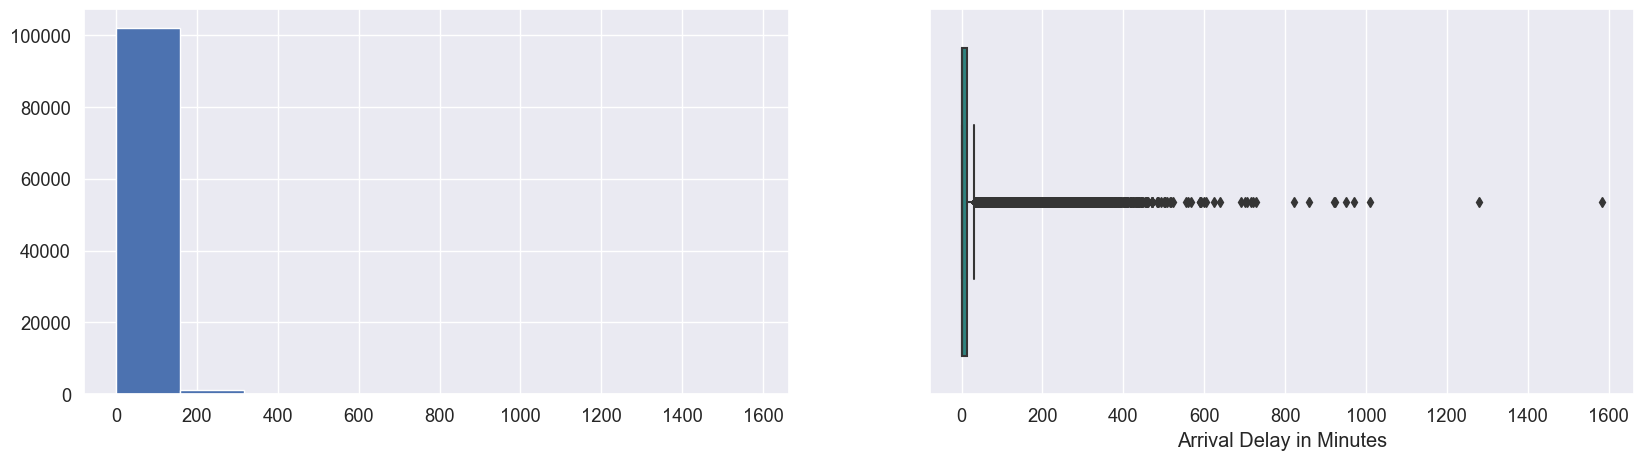

In [164]:
sns.set_context('notebook', font_scale= 1.2)
for col in num_columns:
    fig, ax = plt.subplots(1, 2, figsize = (20, 5))
    df_train[col].hist(ax=ax[0])
    sns.boxplot(x = df_train[col], ax= ax[1], palette= 'viridis')
    sns.set_context()

Majority of the flights have no delay, therefore both the Departure delay and arrival delay distributions are heavily skewed.
Majority of the flights have distance lesser than 1000 Km and only some have distance greater than 4000 Km

### Categorical Variables

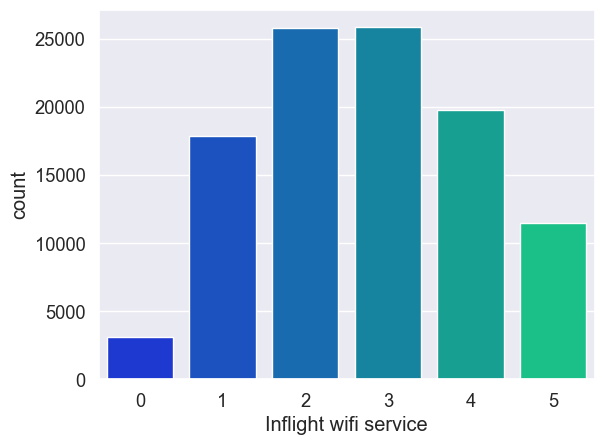

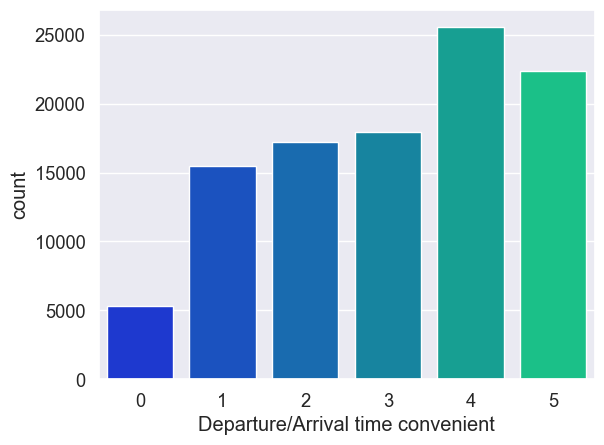

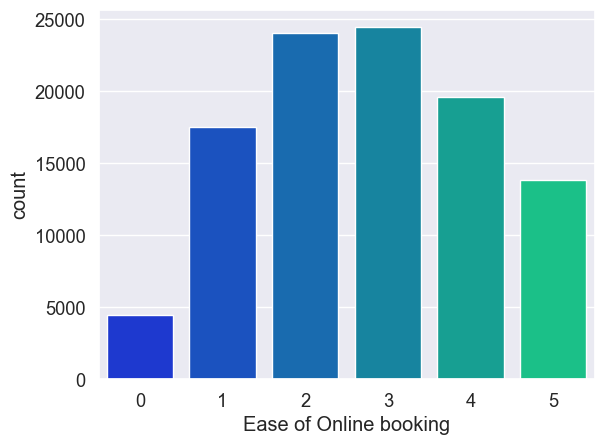

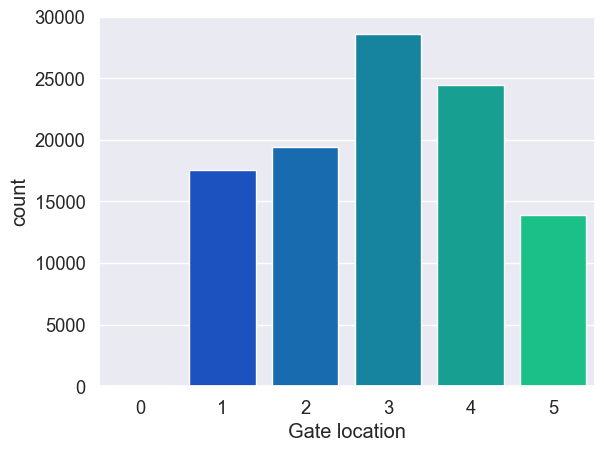

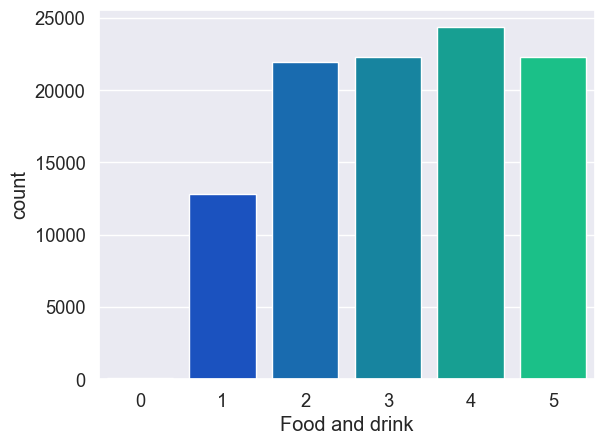

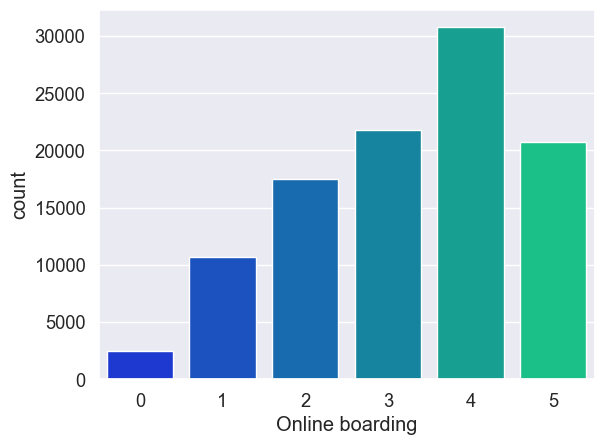

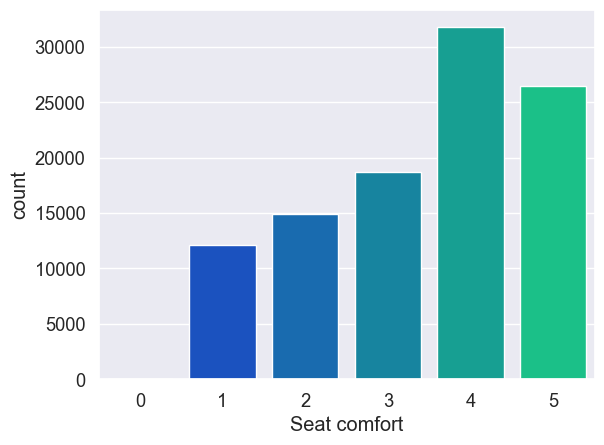

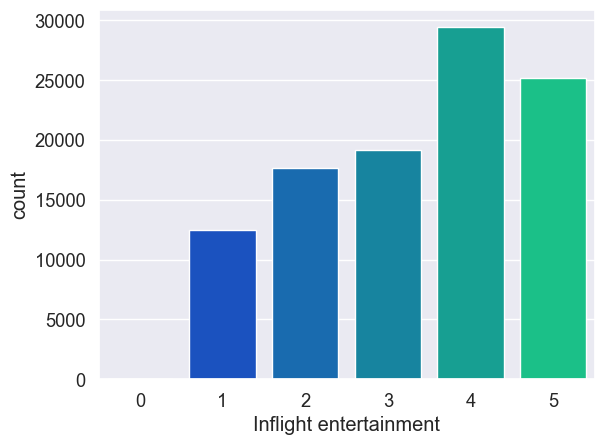

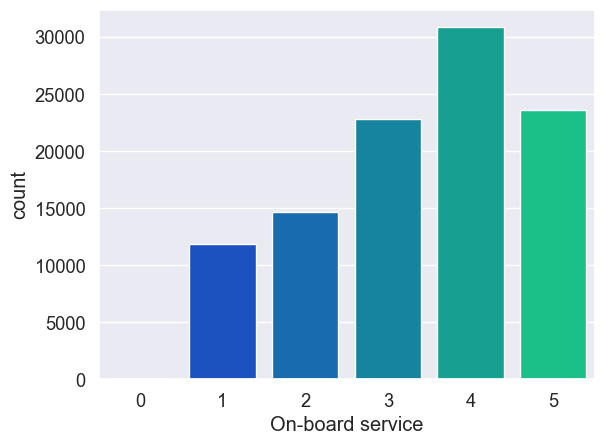

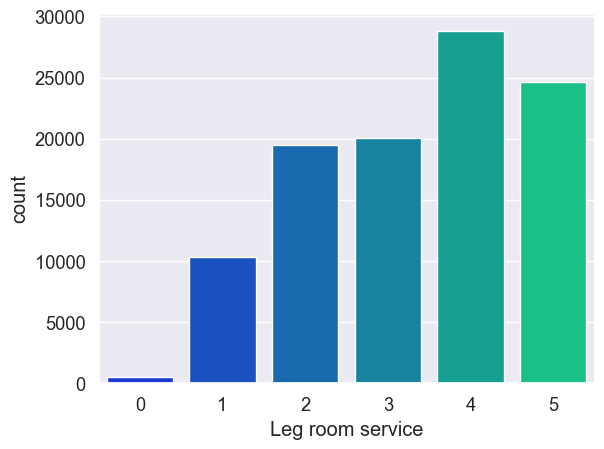

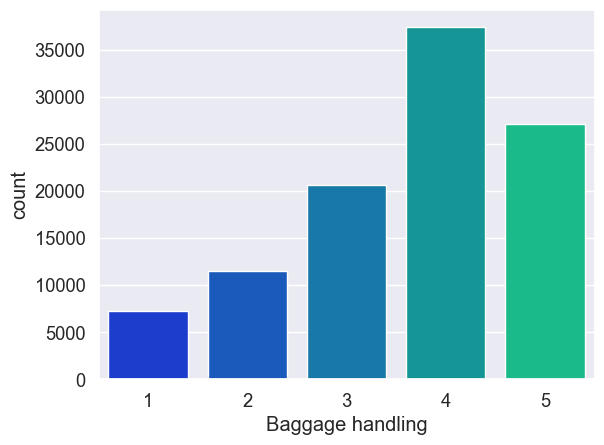

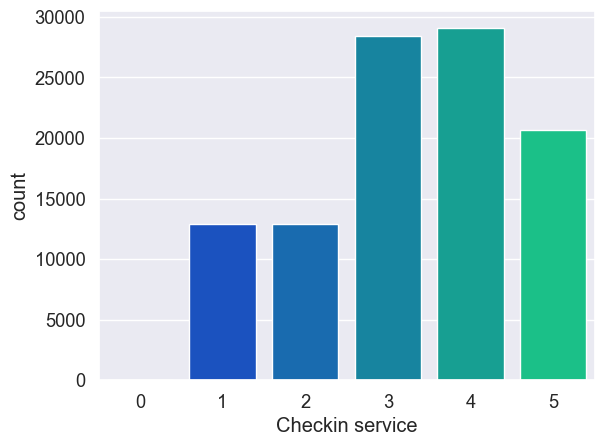

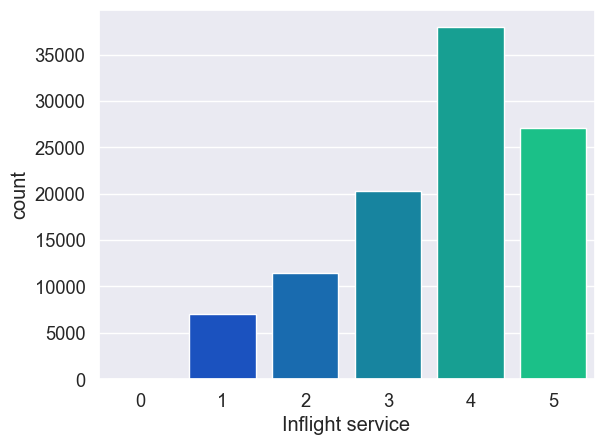

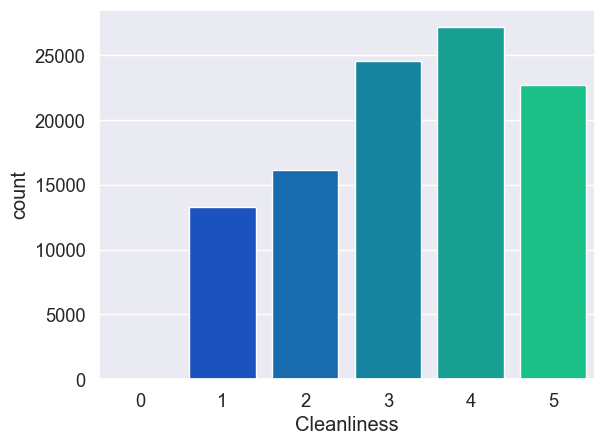

In [165]:
for col in categor_col:
       sns.countplot(x = col, data = df_train, palette= 'winter')
       plt.show()


Food and Drink facilities have almost equal number of 2, 3, 4 and 5 ratings.
Wifi and Ease of Online Booking have recieved 2 out of 5 majority of the times

<AxesSubplot:>

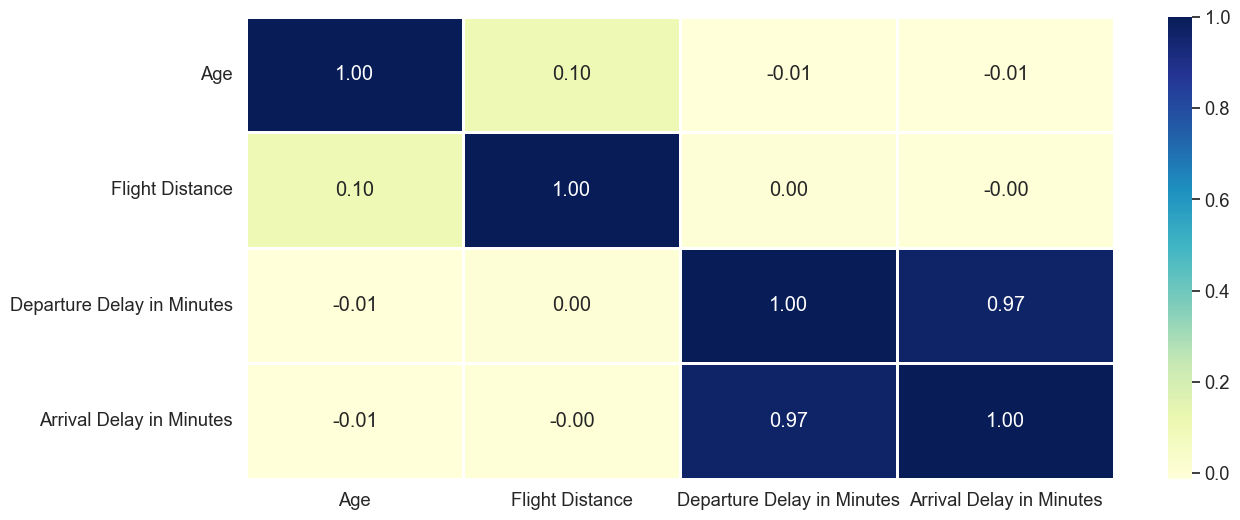

In [166]:
plt.figure(figsize= (14, 6))
sns.heatmap(df_train.corr(), annot = True, fmt = '.2f', linewidths= 0.8, cmap="YlGnBu")

Departure Delay and Arrival delay are heavily correlated with each other, therefore one of them should be dropped


In [167]:
import plotly.express as px

In [168]:
px.scatter(df_train ,x='Departure Delay in Minutes',y='Arrival Delay in Minutes')

# DATA CLEANING

In [169]:
df_train.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [170]:
df_train['Arrival Delay in Minutes'].fillna(df_train['Arrival Delay in Minutes'].median(),inplace=True)

In [171]:
df_test['Arrival Delay in Minutes'].fillna(df_train['Arrival Delay in Minutes'].median(),inplace=True)

In [172]:
df_train['Food and drink'].value_counts()


4    24359
5    22313
3    22300
2    21988
1    12837
0      107
Name: Food and drink, dtype: int64

In [173]:
df_train['Inflight service'].value_counts()

4    37945
5    27116
3    20299
2    11457
1     7084
0        3
Name: Inflight service, dtype: int64

In [174]:
df_train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [175]:
df_train['Departure/Arrival time convenient'].value_counts()
#Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
columns_containing_0 = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Checkin service', 'Inflight service', 'Cleanliness']
modes = df_train[columns_containing_0].mode()
df_train[columns_containing_0] = df_train[columns_containing_0].replace({'0': modes})
df_test[columns_containing_0] = df_test[columns_containing_0].replace({'0': modes})


# Feature Engineer

In [176]:
df_train['Gender'] = df_train['Gender'].map({'Male' : 0, 'Female' : 1})
df_train['Customer Type'] = df_train['Customer Type'].map({'Loyal Customer' : 0, 'disloyal Customer' : 1})
df_train['Type of Travel'] = df_train['Type of Travel'].map({'Personal Travel' : 0, 'Business travel' : 1})
df_train['Class'] = df_train['Class'].map({'Business' : 2, 'Eco Plus' : 1, 'Eco' : 0})
df_train['satisfaction'] = df_train['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})


df_test['Gender'] = df_test['Gender'].map({'Male' : 0, 'Female' : 1})
df_test['Customer Type'] = df_test['Customer Type'].map({'Loyal Customer' : 0, 'disloyal Customer' : 1})
df_test['Type of Travel'] = df_test['Type of Travel'].map({'Personal Travel' : 0, 'Business travel' : 1})
df_test['Class'] = df_test['Class'].map({'Business' : 2, 'Eco Plus' : 1, 'Eco' : 0})
df_test['satisfaction'] = df_test['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})


In [177]:
X_train = df_train.drop('satisfaction', axis = 1)
y_train = df_train.satisfaction

X_test = df_test.drop('satisfaction', axis=1)
y_test = df_test.satisfaction

X_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,0,13,0,1,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,0,1,25,1,2,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,1,0,26,1,2,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,1,0,25,1,2,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,0,0,61,1,2,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,1,1,23,1,0,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0
103900,0,0,49,1,2,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0
103901,0,1,30,1,2,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0
103902,1,1,22,1,0,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0


In [178]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [179]:
X_train

array([[-1.01503056, -0.4727667 , -1.7452793 , ...,  1.30586973,
         0.26639265,  0.07416916],
       [-1.01503056,  2.11520819, -0.95136024, ..., -1.74229153,
        -0.36137482, -0.23631279],
       [ 0.98519201, -0.4727667 , -0.88520032, ...,  1.30586973,
        -0.3875318 , -0.39155376],
       ...,
       [-1.01503056,  2.11520819, -0.62056063, ...,  0.54382941,
        -0.20443295, -0.02932482],
       [ 0.98519201,  2.11520819, -1.14984   , ..., -1.74229153,
        -0.3875318 , -0.39155376],
       [-1.01503056, -0.4727667 , -0.8190404 , ..., -1.74229153,
        -0.3875318 , -0.39155376]])

# K Nearest Neigbors


In [180]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, y_train)
k = KFold(n_splits = 5)
score = cross_val_score(knn, X_train, y_train, scoring = 'accuracy', cv = k).mean()
print("Accuracy on the training set:", round(score, 3))

Accuracy on the training set: 0.926


In [181]:
y_pred = knn.predict(X_test)
print("Accuracy on the test set:", round(accuracy_score(y_test, y_pred), 3))

Accuracy on the test set: 0.926


In [182]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.96      0.94     14573
           1       0.94      0.89      0.91     11403

    accuracy                           0.93     25976
   macro avg       0.93      0.92      0.92     25976
weighted avg       0.93      0.93      0.93     25976



# Logistic regression

In [183]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
score = cross_val_score(knn, X_train, y_train, scoring = 'accuracy', cv = 5).mean()
print("Accuracy on the training set:", round(score, 3))

Accuracy on the training set: 0.926


In [184]:
y_pred = model.predict(X_test)
print("Accuracy on the test set:", round(accuracy_score(y_test, y_pred), 3))

Accuracy on the test set: 0.871


# XGBOOST

In [185]:
from xgboost import XGBClassifier, plot_importance
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)
score = cross_val_score(model_xgb, X_train, y_train, scoring = 'accuracy', cv = 5).mean()
print("Accuracy on the training set:", round(score, 3))
y_pred = model_xgb.predict(X_test)
print("Accuracy on the test set:", round(accuracy_score(y_test, y_pred), 3))
print(classification_report(y_test,y_pred))

Accuracy on the training set: 0.963
Accuracy on the test set: 0.963
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.95      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



# ANN

In [186]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [187]:
ann = tf.keras.models.Sequential()

In [188]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [189]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [190]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [191]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [192]:
ann.fit(X_train, y_train.values, batch_size = 32, epochs = 100)

Epoch 1/100
103904/103904 [==============================] - 2s 21us/sample - loss: 0.2669 - acc: 0.8953
Epoch 2/100
103904/103904 [==============================] - 2s 20us/sample - loss: 0.1838 - acc: 0.9286
Epoch 3/100
103904/103904 [==============================] - 2s 19us/sample - loss: 0.1715 - acc: 0.9316
Epoch 4/100
103904/103904 [==============================] - 2s 20us/sample - loss: 0.1656 - acc: 0.9338
Epoch 5/100
103904/103904 [==============================] - 2s 19us/sample - loss: 0.1616 - acc: 0.9343
Epoch 6/100
103904/103904 [==============================] - 2s 19us/sample - loss: 0.1588 - acc: 0.9354
Epoch 7/100
103904/103904 [==============================] - 2s 19us/sample - loss: 0.1563 - acc: 0.9364
Epoch 8/100
103904/103904 [==============================] - 2s 19us/sample - loss: 0.1541 - acc: 0.9372
Epoch 9/100
103904/103904 [==============================] - 2s 20us/sample - loss: 0.1519 - acc: 0.9378
Epoch 10/100
103904/103904 [===========================

103904/103904 [==============================] - 2s 21us/sample - loss: 0.1248 - acc: 0.9498
Epoch 79/100
103904/103904 [==============================] - 2s 21us/sample - loss: 0.1247 - acc: 0.9497
Epoch 80/100
103904/103904 [==============================] - 2s 21us/sample - loss: 0.1248 - acc: 0.9494
Epoch 81/100
103904/103904 [==============================] - 2s 21us/sample - loss: 0.1247 - acc: 0.9499
Epoch 82/100
103904/103904 [==============================] - 2s 21us/sample - loss: 0.1243 - acc: 0.9504
Epoch 83/100
103904/103904 [==============================] - 2s 21us/sample - loss: 0.1248 - acc: 0.9494
Epoch 84/100
103904/103904 [==============================] - 2s 21us/sample - loss: 0.1245 - acc: 0.9495
Epoch 85/100
103904/103904 [==============================] - 2s 22us/sample - loss: 0.1244 - acc: 0.9497
Epoch 86/100
103904/103904 [==============================] - 2s 21us/sample - loss: 0.1243 - acc: 0.9491
Epoch 87/100
103904/103904 [==============================]

The model is defined with three layers:
- The first layer (tf.keras.layers.Dense()) has 6 units/neurons and uses the ReLU activation function.
- The second layer is identical to the first layer.
- The third layer has 1 unit/neuron and uses the sigmoid activation function. This is because the task is binary classification, and sigmoid activation outputs values between 0 and 1, representing the probability of the positive class.
- The model is compiled with the Adam optimizer, binary cross-entropy loss function, and accuracy as the evaluation metric.
- The batch_size parameter determines the number of samples per gradient update. In this case, it is set to 32, meaning that the model will update its weights after processing 32 samples.
- The epochs parameter determines the number of times the model will iterate over the entire training dataset.
- During training, the model prints the loss and accuracy metrics for each epoch.

By training the model, you are updating the weights and biases of the neural network based on the training data. The goal is for the model to learn patterns and relationships in the data that will allow it to make accurate predictions on unseen data.

In [193]:
# This is a signle predict for a random passenger with random information
print(ann.predict(s.transform([[1, 0, 35, 1,2,800,2,3,3,2,5,2,5,1,4,2,4,4,5,2,30,15]])) > 0.5)

[[ True]]


C:\Users\petro\anaconda3\envs\new_env\lib\site-packages\sklearn\base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [194]:
# the reason for applying the threshold of 0.5 to y_pred is because the problem is binary classification.
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)


In [195]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14026   547]
 [  777 10626]]


0.9490298737295966

The confusion matrix cm provides information about the number of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions. The matrix you obtained indicates the following:

- True positives (TP): 14026
- True negatives (TN): 10626
- False positives (FP): 547
- False negatives (FN): 777

The accuracy score, obtained using accuracy_score(y_test, y_pred), is approximately 0.9490, which indicates that the model achieved an accuracy of 94.90% on the test data. This means that the model correctly predicted the class labels for 94.90% of the samples in y_test.

In [196]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     14573
           1       0.95      0.93      0.94     11403

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



- Precision: The precision for both classes (0 and 1) is high, with values of 0.95 and 0.95 respectively. This indicates that when the model predicts a sample as belonging to a particular class, it is usually correct.

- Recall: The recall for both classes is also quite good, with values of 0.96 for class 0 and 0.93 for class 1. This suggests that the model can effectively identify the majority of the positive samples in each class.

- F1-Score: The F1-score combines precision and recall, providing a balanced measure of the model's performance. Both classes have F1-scores above 0.94 and 0.95, indicating a good balance between precision and recall.

- Accuracy: The overall accuracy of the model is 0.95, which means it correctly predicts the class for 95% of the samples in the test set.